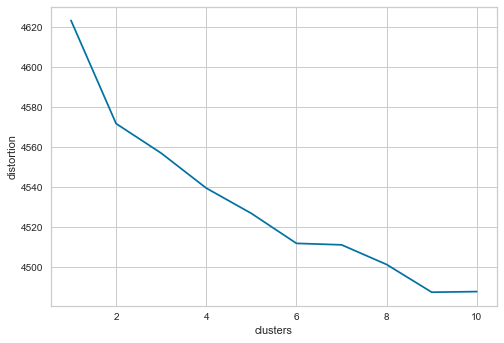

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("news_corpus_processed.csv")

documents = df['Synopsis']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300)
model.fit(X)

def clustering(vector):
    distance_from_centroid = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i,init = 'k-means++').fit(vector)
        #kmeans.fit(vector)
        #print(i)
        distance_from_centroid.append(kmeans.inertia_)
    plt.plot(range(1, 11), distance_from_centroid)
    plt.xlabel("clusters")
    plt.ylabel("distortion")
    plt.show()
    
clustering(X)

For no of clusters = 2  The average silhouette_score is : 0.006650392479203046
For no of clusters = 3  The average silhouette_score is : 0.006942269205126801
For no of clusters = 4  The average silhouette_score is : 0.006973104076605802
For no of clusters = 5  The average silhouette_score is : 0.007679404236913119
For no of clusters = 6  The average silhouette_score is : 0.007948599740931933
For no of clusters = 7  The average silhouette_score is : 0.009101408206237867
For no of clusters = 8  The average silhouette_score is : 0.009379619537667132
For no of clusters = 9  The average silhouette_score is : 0.009489796472909902
For no of clusters = 10  The average silhouette_score is : 0.009730835533084873


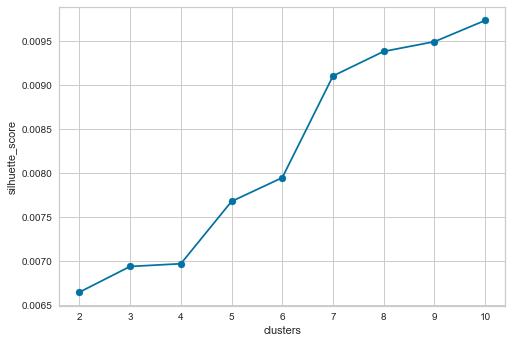

In [36]:
def clustering1(news_vector):
    from sklearn.metrics import silhouette_score

    no_of_clusters = [2, 3, 4, 5, 6,7,8,9,10]
    s = []
    for n_clusters in no_of_clusters:
        cluster = KMeans(n_clusters)
        cluster_labels = cluster.fit_predict(news_vector)
        silhouette_avg = silhouette_score(news_vector, cluster_labels)
        s.append(silhouette_avg)
        print("For no of clusters =", n_clusters,
              " The average silhouette_score is :", silhouette_avg)
    plt.plot(no_of_clusters, s)
    plt.scatter(no_of_clusters, s)
    plt.xlabel("clusters")
    plt.ylabel("silhuette_score")
    plt.show()
    
clustering1(X)

In [18]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    
    for ind in order_centroids[i, :100]:
        print(' %s' % terms[ind], end =',')
    print()
    

Top terms per cluster:
Cluster 0:
 said, year, make, like, look, new, govern, need, work, state, peopl, day, recent, indian, share, home, easi, recip, use, covid, instagram, includ, world, actor, week, countri, help, nation, say, minist, tri, video, life, month, come, health, woman, way, post, announc, seen, start, bank, mani, set, exercis, report, player, compani, good, court, simpl, accord, base, took, pandem, plan, cent, intern, team, old, social, end, right, match, singh, educ, polit, lockdown, face, support, space, tip, follow, case, august, game, crore, chang, sinc, wwe, place, power, healthi, public, bodi, statement, want, citi, issu, trump, offer, question, fit, school, provid, love, step, talk, student,
Cluster 1:
 time, recip, year, make, easi, world, work, said, champion, point, state, look, like, major, new, race, close, come, home, pandem, day, say, season, import, good, famili, wwe, govern, grand, need, second, earth, record, chang, covid, bank, set, period, start, place,

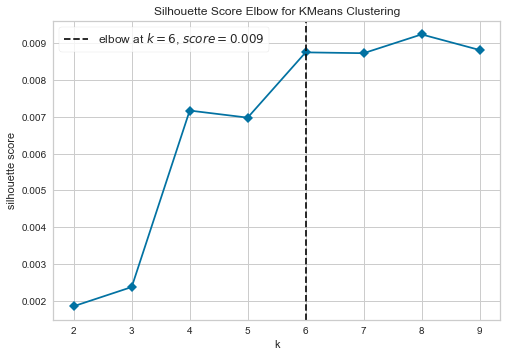

In [29]:
from yellowbrick.cluster import KElbowVisualizer
def silhouette_curve(model,X):  
    # Instantiate the KElbowVisualizer with the number of clusters and the metric 
    visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

    # Fit the data and visualize
    visualizer.fit(X)    
    visualizer.poof() 
    
silhouette_curve(model,X)